In [31]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pyda

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.dsp.spectral import psd, logpsd
import numpy
import pandas as pd

FigSize = (15, 10)  # global setting for figure size



In [17]:
# Load the data

tsdata = "/Users/martin.hewitson/Downloads/time_series.csv"

data = pd.read_csv(tsdata)
print(data)
phase1 = TSData(xaxis=data['Time (s)'].values, yaxis=data['Phase 1'].values)
phase2 = TSData(xaxis=data['Time (s)'].values, yaxis=data['Phase 2'].values)
difference = TSData(xaxis=data['Time (s)'].values, yaxis=data['Difference'].values)




        Time (s)     Phase 1     Phase 2  Difference
0       0.000000   -0.599113   -0.605341    0.006228
1       0.033554   -0.177387   -0.183603    0.006216
2       0.067109    0.244375    0.238147    0.006229
3       0.100663    0.666063    0.659830    0.006233
4       0.134218    1.087660    1.081447    0.006214
...          ...         ...         ...         ...
9994  335.342993  216.787384  216.781159    0.006225
9995  335.376548  217.209145  217.202908    0.006237
9996  335.410102  217.630800  217.624568    0.006232
9997  335.443657  218.052325  218.046118    0.006207
9998  335.477211  218.473752  218.467541    0.006210

[9999 rows x 4 columns]


In [50]:


S_phase1 = logpsd(phase1,
                  window_function=numpy.kaiser,
                  psll=200,
                  olap=0,
                  bmin=1,
                  Lmin=0,
                  Jdes=100,
                  Kdes=10,
                  order=0,
                  scale="PSD")

S_phase2 = logpsd(phase2,
                  window_function=numpy.kaiser,
                  psll=200,
                  olap=0,
                  bmin=1,
                  Lmin=0,
                  Jdes=100,
                  Kdes=10,
                  order=0,
                  scale="PSD")

S_phaseDiff = logpsd(difference,
                  window_function=numpy.kaiser,
                  psll=200,
                  olap=0,
                  bmin=1,
                  Lmin=0,
                  Jdes=100,
                  Kdes=10,
                  order=0,
                  scale="PSD")



* computing lpsd of TSdata ...
* computing lpsd of TSdata ...
* computing lpsd of TSdata ...


[<Figure size 640x480 with 0 Axes>,
 [<Axes: xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[1/\\,{\\sqrt{\\mathrm{Hz}}} \\right]$'>],
 []]

<Figure size 640x480 with 0 Axes>

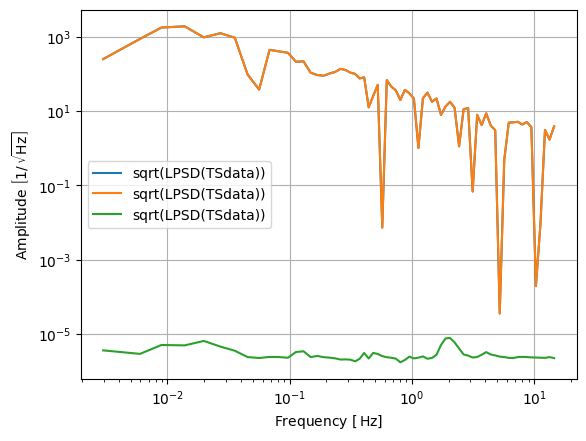

In [51]:
S_phase1.sqrt().loglog(S_phase2.sqrt(), S_phaseDiff.sqrt())

In [52]:
S_phase1.save("S_phase1.txt")
S_phase2.save("S_phase2.txt")
S_phaseDiff.save("S_phaseDiff.txt")

In [53]:
dir(S_phase1)

print(S_phase1)

-------- FSData ---------
  name: LPSD(TSdata)
  uuid: 1955f9c5-f721-41ac-a135-6d392d79765c
     x: Frequency=(67,)[Hz]
     y: Amplitude=(67,)[Hz^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(67,)[Hz^(-1)]

-----------------------------


[2.98053029e-03 5.96106058e-03 8.94159088e-03 1.38088655e-02
 1.98576421e-02 2.71123457e-02 3.55885466e-02 4.52993066e-02
 5.62560428e-02 6.84651056e-02 8.19320384e-02 9.66637846e-02
 1.12669328e-01 1.29946037e-01 1.48502900e-01 1.68344659e-01
 1.89466079e-01 2.11873840e-01 2.35564080e-01 2.60545071e-01
 2.86825779e-01 3.14394995e-01 3.43245258e-01 3.73749171e-01
 4.06973610e-01 4.43141477e-01 4.82562539e-01 5.25443578e-01
 5.72155682e-01 6.23012888e-01 6.78407539e-01 7.38736127e-01
 8.04380009e-01 8.75848408e-01 9.53661260e-01 1.03832695e+00
 1.13059420e+00 1.23093872e+00 1.34050608e+00 1.45971537e+00
 1.58929069e+00 1.73053392e+00 1.88415414e+00 2.05158292e+00
 2.23441925e+00 2.43310140e+00 2.64906026e+00 2.88372421e+00
 3.14064079e+00 3.41916716e+00 3.72327249e+00 4.05440941e+00
 4.41347353e+00 4.80560935e+00 5.23135682e+00 5.69701810e+00
 6.20214221e+00 6.75403707e+00 7.35008352e+00 7.99796009e+00
 8.70753920e+00 9.49181084e+00 1.03433058e+01 1.12746283e+01
 1.22680391e+01 1.337182

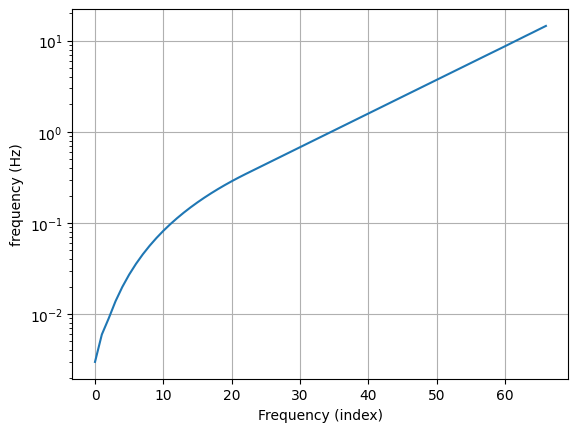

In [55]:
idx = numpy.arange(0, len(S_phase1.xdata()))
print(S_phase1.xdata())
plt.figure()
plt.semilogy(idx, S_phase1.xdata())
plt.xlabel('Frequency (index)')
plt.ylabel("frequency (Hz)")
plt.grid()
